http://www.inf.u-szeged.hu/~szepet/python/tip.py

https://scikit-fuzzy.readthedocs.io/en/latest/auto_examples/plot_control_system_advanced.html

https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.membership.html

https://github.com/scikit-fuzzy/scikit-fuzzy/blob/master/skfuzzy/control/tests/test_controlsystem.py

## Attempt-1 uisng `mf=3`

In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [5]:
w1 = ctrl.Antecedent(np.arange(0, 100, 10), 'B_leaf')
w1.automf(3)                    # Available options: 'poor'; 'average', or 'good'
w2 = ctrl.Antecedent(np.arange(0, 100, 10), 'Peels')
w2.automf(3)
w3 = ctrl.Antecedent(np.arange(0, 100, 10), 'Bones')
w3.automf(3)

speed = ctrl.Consequent(np.arange(0, 1400), 'speed')
# speed.automf(3)                 #  Available options: 'poor'; 'mediocre'; 'average'; 'decent', or 'good'
temp = ctrl.Consequent(np.arange(0, 2000), 'temp')
# temp.automf(3)

In [60]:
# mf for 
# speed['lowest'] = fuzz.trimf(speed.universe, [0, 150, 300])
speed['low'] = fuzz.trapmf(speed.universe, [0, 200, 400, 600])
speed['medium'] = fuzz.trapmf(speed.universe, [400, 600, 800, 1000])
speed['high'] = fuzz.trapmf(speed.universe, [800, 1000, 1200, 1400])
# speed['highest'] = fuzz.trimf(speed.universe, [800, 950, 1100])

# mf for temperature 
# temp['lowest'] = fuzz.trimf(temp.universe, [0, 300, 600])
temp['low'] = fuzz.trimf(temp.universe, [0, 0, 600])
temp['medium'] = fuzz.trimf(temp.universe, [250, 800, 1300])
temp['high'] = fuzz.trimf(temp.universe, [900, 1450, 2000])
# temp['highest'] = fuzz.trimf(temp.universe, [1600, 1900, 2200])

temp['low'] = fuzz.trimf(temp.universe, [0, 400, 800])
temp['medium'] = fuzz.trimf(temp.universe, [500, 900, 1300])
temp['high'] = fuzz.trimf(temp.universe, [1000, 1400, 1800])

In [61]:
# Antecedent[w1, w2, w3] --> Available options: 'poor'; 'average', or 'good'
# Condequent[speed, temp] --> Available options: 'low', 'medium', 'high'

r1 = ctrl.Rule(w1['good'] | w2['good'] | w3['poor'], speed['high'])
r2 = ctrl.Rule(w3['average'] | w3['good'], speed['low'])
r3 = ctrl.Rule(w1['good'] & w2['average'] | w3['poor'], speed['high'])
r4 = ctrl.Rule(w2['average'] & w3['average'], speed['medium'])

r5 = ctrl.Rule(w1['good'] | w2['good'] | w3['poor'], temp['high'])
r6 = ctrl.Rule(w1['poor'] | w2['poor'] & w3['good'], temp['low'])
r7 = ctrl.Rule(w1['poor'] | w2['average'] | w3['average'], temp['medium'])
r8 = ctrl.Rule(w1['poor'] | w2['poor'] & w3['average'], temp['low'])

In [62]:
velocity_ctrl = ctrl.ControlSystem([r1, r2, r3, r4])
velocity = ctrl.ControlSystemSimulation(velocity_ctrl)
velocity.input['B_leaf'] = 40
velocity.input['Peels'] = 20
velocity.input['Bones'] = 40
velocity.compute()
velocity.output['speed']

501.649484947259

In [63]:
temperature_ctrl = ctrl.ControlSystem([r5, r6, r7, r8])
temperature = ctrl.ControlSystemSimulation(temperature_ctrl)
temperature.input['B_leaf'] = 40
temperature.input['Peels'] = 20
temperature.input['Bones'] = 40
temperature.compute()
temperature.output['temp']

719.7170539790577

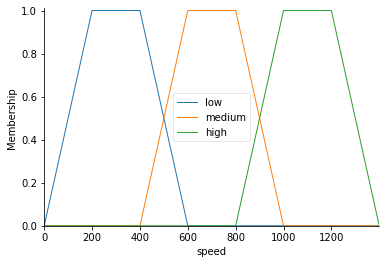

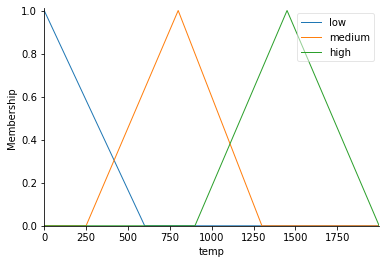

In [66]:
speed.view()
temp.view()

Speed output by fuzzy:  501.65 RPM -- Temperature by fuzzy:  719.72 °C


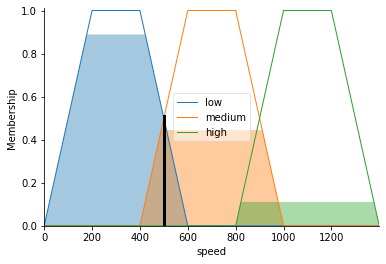

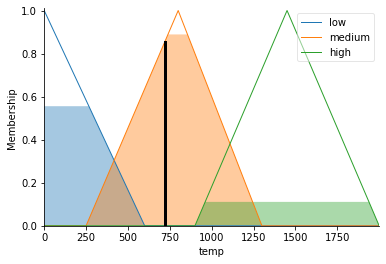

In [78]:
import warnings
warnings.filterwarnings('ignore')
speed.view(sim=velocity)
print("Speed output by fuzzy: {: .2f} RPM".format(velocity.output['speed']), end=' -- ')
# speed.view()
temp.view(sim=temperature)
print(("Temperature by fuzzy: {: .2f}" + u" \N{DEGREE SIGN}" +"C").format(temperature.output['temp']))

719.72 °C


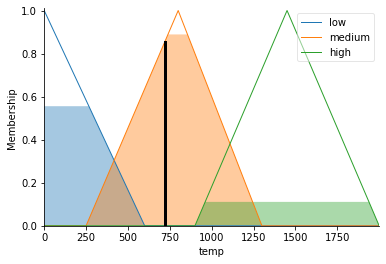

In [65]:
temp.view(sim=temperature)
print(("{:.2f}" + u" \N{DEGREE SIGN}" +"C").format(temperature.output['temp']))
# temp.view()

In [9]:
'''
        * dismal
        * poor
        * mediocre
        * average (always middle)
        * decent
        * good
        * excellent
        and for ``'quant'`` as::
        * lowest
        * lower
        * low
        * average (always middle)
        * high
        * higher
        * highest
'''

"\n        * dismal\n        * poor\n        * mediocre\n        * average (always middle)\n        * decent\n        * good\n        * excellent\n        and for ``'quant'`` as::\n        * lowest\n        * lower\n        * low\n        * average (always middle)\n        * high\n        * higher\n        * highest\n"

In [10]:
import numpy as np

from skfuzzy.control.controlsystem import (
    Antecedent, Consequent, ControlSystem, ControlSystemSimulation,
    CrispValueCalculator, Rule)

def test_crisp_value_calculator_1():
    x1 = Antecedent(np.linspace(0, 10, 11), "x1")
    x1.automf(3)  # term labels: poor, average, good
    x2 = Antecedent(np.linspace(0, 10, 11), "x2")
    x2.automf(3)

    y1 = Consequent(np.linspace(0, 10, 11), "y1")
    y1.automf(3)
    y2 = Consequent(np.linspace(0, 10, 11), "y2")
    y2.automf(3)

    r1 = Rule(x1["poor"], y1["good"])
    r2 = Rule(x2["poor"], y2["good"])
    sys = ControlSystem([r1, r2])

    sim = ControlSystemSimulation(sys)
    cvc = CrispValueCalculator(x1, sim)

    cvc.fuzz(0)
    values = {label: term.membership_value[sim]
              for label, term in x1.terms.items()}
    assert values == {
        "poor": 1,
        "average": 0,
        "good": 0,
    }

    cvc.fuzz(2.5)
    values = {label: term.membership_value[sim]
              for label, term in x1.terms.items()}
    assert values == {
        "poor": .5,
        "average": .5,
        "good": 0,
    }

    cvc.fuzz(5)
    values = {label: term.membership_value[sim]
              for label, term in x1.terms.items()}
    assert values == {
        "poor": 0,
        "average": 1,
        "good": 0,
    }

In [11]:
test_crisp_value_calculator_1()

C:\Users\Afrid\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


11.507068157230437 None


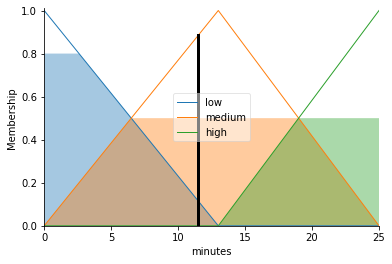

In [12]:
# time for heating ouput
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temprature = ctrl.Antecedent(np.arange(0, 2001, 200), 'temperature')
moisture = ctrl.Antecedent(np.arange(0, 11, 1), 'moisture')
minutes = ctrl.Consequent(np.arange(0,26, 1), 'minutes')
temprature.automf(3)
moisture.automf(3)
minutes['low'] = fuzz.trimf(minutes.universe, [0, 0, 13])
minutes['medium'] = fuzz.trimf(minutes.universe, [0, 13, 25])
minutes['high'] = fuzz.trimf(minutes.universe, [13, 25, 25])
rule1 = ctrl.Rule(temprature['poor'] | moisture['poor'] , minutes['low'])
rule2 = ctrl.Rule(temprature['average'] | moisture['average'], minutes['medium'])
rule3 = ctrl.Rule(temprature['good'] | moisture['good'], minutes['high'])
tap_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tap_control_system = ctrl.ControlSystemSimulation(tap_ctrl)
tap_control_system.input['temperature'] = 1500
tap_control_system.input['moisture'] = 1
tap_control_system.compute()
print(tap_control_system.output['minutes'], minutes.view(sim=tap_control_system))

## Looping over inputs to cal time required for heating 

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random, time

def init():
    quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
    service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
    tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

    quality.automf(3)
    service.automf(3)

    tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
    tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
    tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

    rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
    rule2 = ctrl.Rule(service['average'], tip['medium'])
    rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])
    
    #quality.automf(7) ##If I put new membership function here, I will get an error
    '''
    #I have to define the rules again
    '''
    global tipping_ctrl
    tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

def calc(quality,service):
    #I would like to change the control system( membership function) here, but how?
    tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

    tipping.input['quality'] = quality
    tipping.input['service'] = service

    tipping.compute()

    print(tipping.output['tip'])

if __name__ == '__main__':
    init()
    count = 0
    while count <=10:
        quality = float(random.randint(0,11))
        service = float(random.randint(0,11))
        calc(quality,service)
        count += 1
        time.sleep(1)

13.231189098660167
16.806387225548903
21.0
12.891503267973858
16.806387225548903
14.481108312342574
14.516732197466144
17.012960807140086
13.295287958115182
4.333333333333333
21.0


## 3D graph output

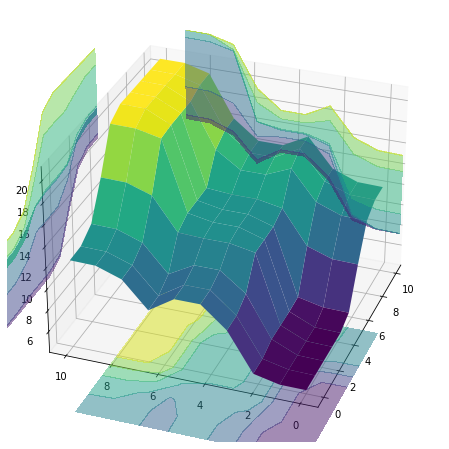

In [14]:
from skfuzzy import control as ctrl
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 10, 0.1), 'quality')
service = ctrl.Antecedent(np.arange(0, 10, 0.1), 'service')
tip = ctrl.Consequent(np.arange(0, 25, 0.1), 'tip')

quality['poor'] = fuzz.zmf(quality.universe, 0,5)
quality['average'] = fuzz.gaussmf(quality.universe,5,1)
quality['good'] = fuzz.smf(quality.universe,5,10)

service['poor'] = fuzz.zmf(service.universe, 0,5)
service['average'] = fuzz.gaussmf(service.universe,5,1)
service['good'] = fuzz.smf(service.universe,5,10)

tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# We can simulate at higher resolution with full accuracy
upsampled = np.linspace(0, 10, 10)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

# Loop through the system 10*10 times to collect the control surface
for i in range(10):
    for j in range(10):
        tipping.input['quality'] = x[i, j]
        tipping.input['service'] = y[i, j]
        tipping.compute()
        z[i, j] = tipping.output['tip']

# Plot the result in pretty 3D with alpha blending
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=13, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=13, cmap='viridis', alpha=0.5)

ax.view_init(30, 200)
plt.show()
plt.ioff()

## Attempt-2 with `mf=5`

In [52]:
w1 = ctrl.Antecedent(np.arange(0, 100, 10), 'B_leaf')
w1.automf(3)                    # Available options: 'poor'; 'average', or 'good'
w2 = ctrl.Antecedent(np.arange(0, 100, 10), 'Peels')
w2.automf(3)
w3 = ctrl.Antecedent(np.arange(0, 100, 10), 'Bones')
w3.automf(3)

speed = ctrl.Consequent(np.arange(0, 1400), 'speed')
# speed.automf(5)                 #  Available options: 'poor'; 'mediocre'; 'average'; 'decent', or 'good'
temp = ctrl.Consequent(np.arange(0, 2000), 'temp')
# temp.automf(5)

In [53]:
# mf for 
speed['lowest'] = fuzz.trapmf(speed.universe, [0, 0, 100, 300])
speed['low'] = fuzz.trapmf(speed.universe, [200, 400, 600, 750])
speed['medium'] = fuzz.trapmf(speed.universe, [500, 700, 900, 1050])
speed['high'] = fuzz.trapmf(speed.universe, [850, 1000, 1200, 1350])
speed['highest'] = fuzz.trapmf(speed.universe, [1050, 1300, 1500, 1650])

# mf for temperature 
temp['lowest'] = fuzz.trimf(temp.universe, [0, 300, 600])
temp['low'] = fuzz.trimf(temp.universe, [400, 700, 1000])
temp['medium'] = fuzz.trimf(temp.universe, [800, 1100, 1400])
temp['high'] = fuzz.trimf(temp.universe, [1200, 1500, 1800])
temp['highest'] = fuzz.trimf(temp.universe, [1600, 1900, 2200])

In [54]:
# Antecedent[w1, w2, w3] --> Available options: 'poor'; 'average', or 'good'
# Condequent[speed, temp] --> Available options: 'low', 'medium', 'high'

r1 = ctrl.Rule(w1['good'] | w2['good'] | w3['poor'], speed['highest'])
r2 = ctrl.Rule(w3['average'] | w3['good'], speed['lowest'])
r3 = ctrl.Rule(w1['good'] & w2['average'] | w3['poor'], speed['high'])
r4 = ctrl.Rule(w2['average'] & w3['average'], speed['medium'])
r41 = ctrl.Rule(w1['poor'] | w2['poor'] & w3['average'], speed['low'])


r5 = ctrl.Rule(w1['good'] | w2['good'] | w3['poor'], temp['high'])
r6 = ctrl.Rule(w1['poor'] | w2['poor'] & w3['good'], temp['low'])
r7 = ctrl.Rule(w1['poor'] | w2['average'] | w3['average'], temp['medium'])
r8 = ctrl.Rule(w1['poor'] | w2['poor'] & w3['average'], temp['low'])

In [55]:
velocity_ctrl = ctrl.ControlSystem([r1, r2, r3, r4])
velocity = ctrl.ControlSystemSimulation(velocity_ctrl)
velocity.input['B_leaf'] = 20
velocity.input['Peels'] = 20
velocity.input['Bones'] = 60
velocity.compute()
velocity.output['speed']

499.1303803803731

In [56]:
temperature_ctrl = ctrl.ControlSystem([r5, r6, r7, r8])
temperature = ctrl.ControlSystemSimulation(temperature_ctrl)
temperature.input['B_leaf'] = 60
temperature.input['Peels'] = 0
temperature.input['Bones'] = 40
temperature.compute()
temperature.output['temp']

1025.1336898395468

C:\Users\Afrid\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


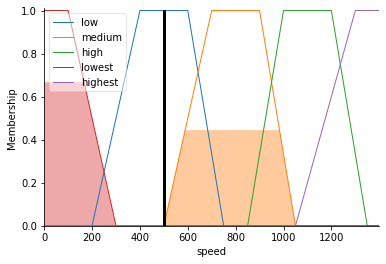

In [47]:
speed.view(sim=velocity)
# plt.ion()
# plt.show()
# plt.ioff()
# speed.view()

C:\Users\Afrid\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


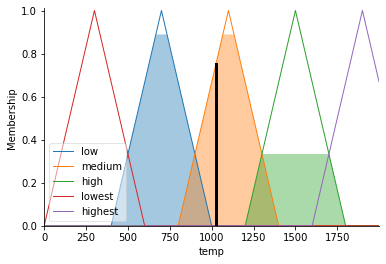

In [48]:
temp.view(sim=temperature)
# temp.view()